In [47]:
import pandas as pd
#import geopandas as gpd
import rasterio as rio
#import rioxarray as rx
import matplotlib.pyplot as plt
import numpy as np


Number of bands: 1
Image resolution: (1737, 4008)
Coordinate Reference System: (PROJCS["WGS_1984_Goode_Homolosine",GEOGCS["GCS_unknown",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Interrupted_Goode_Homolosine"],PARAMETER["central_meridian",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
[1]


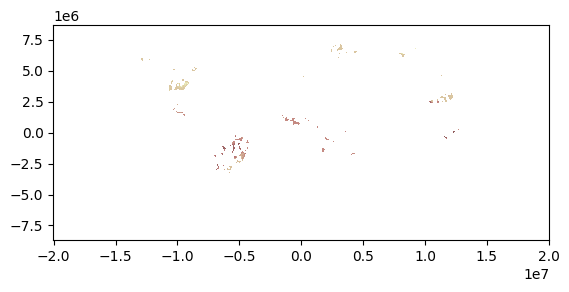

In [46]:
from rasterio.plot import show
from rasterio.warp import transform

xs = np.array([3327493.433, 16177493.43])
ys = np.array([7389201.61, -580798.392])

with rasterio.open("data/TCL_DD_2022_20230407.tif") as src:

    pt = src.xy(0, 0) # latitude is N/S AKA y, 

    print(f'Number of bands: {src.count}')
    print(f'Image resolution: ({src.height}, {src.width})')
    print(f'Coordinate Reference System: ({src.crs}')

    fig, ax = plt.subplots()

    extent = [src.bounds[0], src.bounds[2], src.bounds[1], src.bounds[3]]
    ax = show(src, extent=extent, ax=ax, cmap="pink")

    # https://epsg.io/4326
    # WGS 84 -- WGS84 - World Geodetic System 1984, used in GPS

    # 18.18517 55.56466
    # 29.766234, 69.421527 (latitude, longitude) pakistan
    # -15.28575, -55.94627 (latitude, longitude) brazil
    lat = -15.28575
    long = -55.94627

    to_crs = src.crs
    from_crs = rio.crs.CRS.from_epsg(4326)
    x, y = transform(from_crs, to_crs, [long], [lat])

    # expect 1 - 5... but mention is made of Zero or Minor Loss
    # 1. CommodityDriven.Deforestation
    # 2. Shifting.Agriculture
    # 3. TreeFarm.ForestryOther
    # 4. Wildfire
    # 5. Urban

    for val in src.sample([(x, y)]): 
        print(val)
    